In [22]:
import praw
from praw.models import MoreComments
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
app_id = "o57512j5W5rHmQ"
app_secret = "Eh8IVULz7v3BvRE1IY3pl73SORalHg"
app_uri = 'https://127.0.0.1:65010/authorize_callback'
app_ua = "Isaac"

reddit = praw.Reddit(client_id = app_id, client_secret = app_secret, user_agent = app_uri)

In [4]:
# Gets top 10 posts from a subreddit

subreddit_List = ['socialism','Conservative','denver','DenverCirclejerk','wallstreetbets','stonks','creepypasta','EmojiPasta']
dict_list = []
time_dict = {}
for subred in subreddit_List:
    start = time.time()
    for submission in reddit.subreddit(subred).top("all",limit=100):
        dat = {}
        dat["subreddit"] = subred
        dat["Post Title"] = submission.title
        dat["Post Text"] = submission.selftext
        dat["Upvotes"] = submission.score
        dat["url"] = submission.url
        #print("Post Titled:", submission.title)
        #print("--- End of Title ---",'\n')
        #print("Upvotes:",submission.score)
        # Get top 10 comments
        
        top_comments = list(submission.comments)
        #dat["comments"] = top_comments
        #print("These are the commments")
        commentList = []
        #submission.comments.replace_more(limit=None)
        for top_level_comment in top_comments[:10]:
            #print(top_level_comment.body)
            commentList.append(top_level_comment.body)
           # print("Comment:",top_level_comment.body)
        dat["comments"] = commentList
        dict_list.append(dat)
    time_dict[subred] = time.time()-start
    print((time.time()-start))

212.25267696380615
290.3349657058716
181.71073985099792
27.45708203315735
380.3262917995453
23.69451665878296
45.983447313308716
51.546786308288574


In [45]:
data = pd.DataFrame(dict_list)
times = pd.DataFrame(time_dict,index=[0])
data.to_pickle('./subredditData.pkl')

In [46]:
times = times.transpose().reset_index().rename({'index':'Subreddit',0:'Time'},axis=1)

In [47]:
times

,Subreddit,Time
0,socialism,212.252677
1,Conservative,290.334966
2,denver,181.710740
3,DenverCirclejerk,27.457082
4,wallstreetbets,380.326292
5,stonks,23.694517
6,creepypasta,45.983447
7,EmojiPasta,51.546786


In [48]:
times.to_pickle('./Times.pkl')

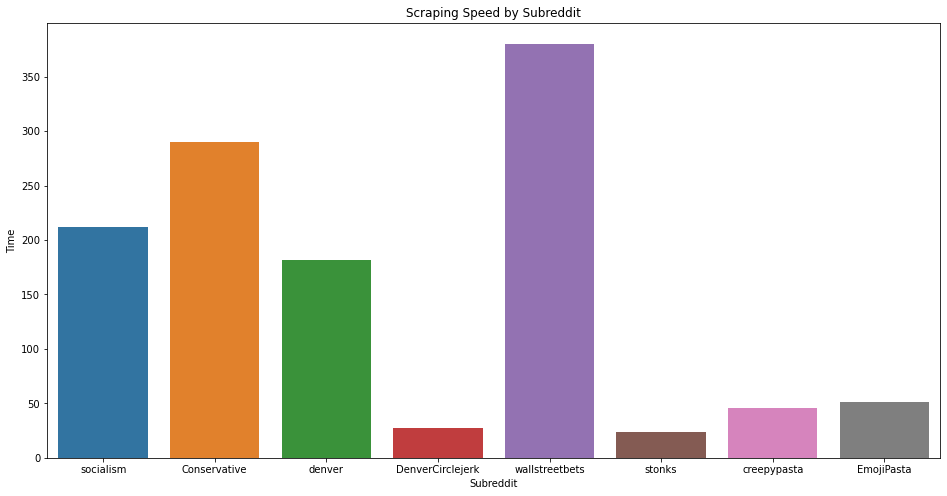

In [49]:
plt.figure(figsize=(16,8))
sns.barplot(x='Subreddit',y='Time',data=times);
plt.title('Scraping Speed by Subreddit');

In [54]:
subs = set(data.subreddit.unique())

In [63]:
data["words_in_title"] = data['Post Title'].str.split(' ').apply(len)

for subr in list(subs):
    d_slice = data[['subreddit','words_in_title']]
    words_df = d_slice.groupby(by='subreddit').mean().reset_index()

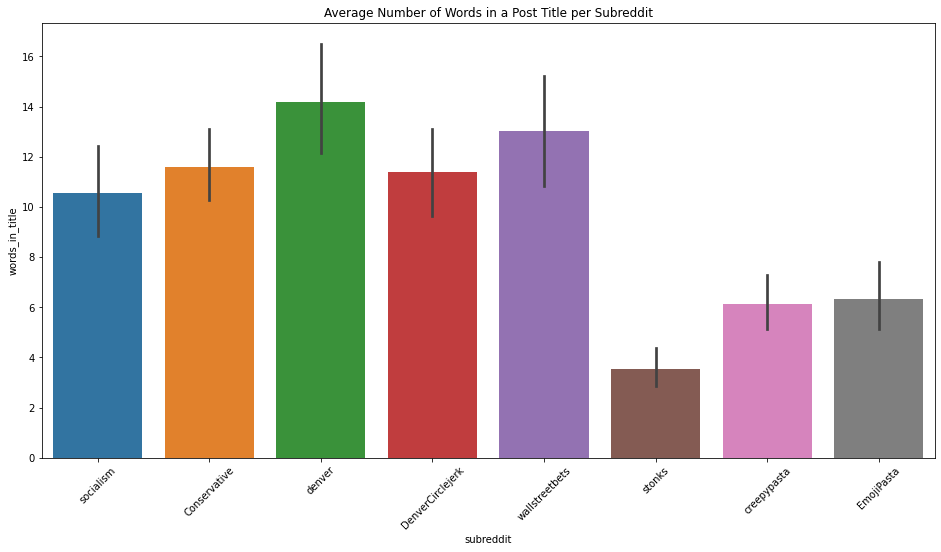

In [65]:
plt.figure(figsize=(16,8))
plt.xticks(rotation=45)
plt.title("Average Number of Words in a Post Title per Subreddit")
plt.xlabel("Subreddit")
plt.ylabel("Average Number of Words in a Post Title")
sns.barplot(x='subreddit',y='words_in_title',data=data)
plt.show()

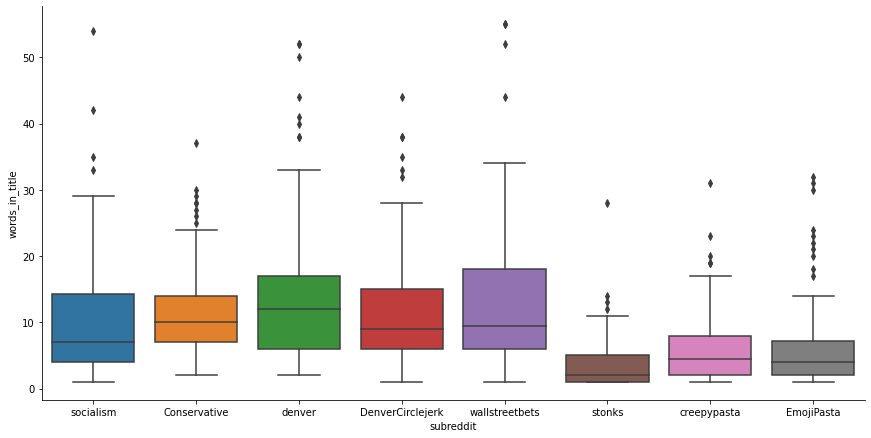

In [81]:

sns.catplot(x='subreddit',y='words_in_title',kind='box',data=data,height=6,aspect=2);


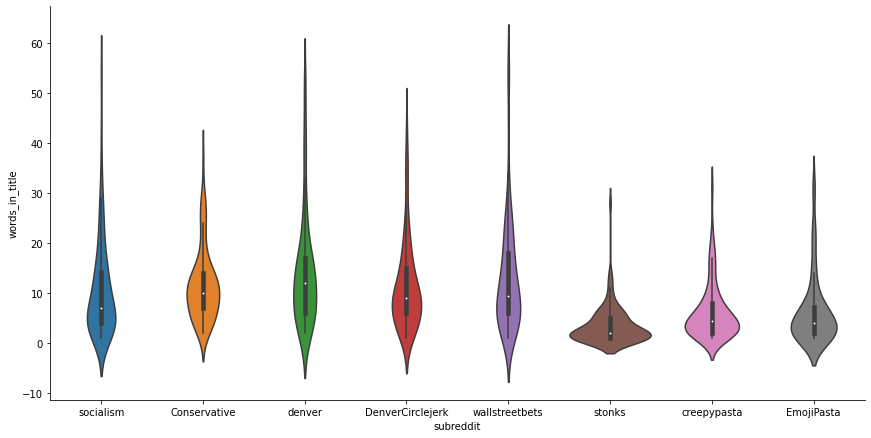

In [82]:
sns.catplot(x='subreddit',y='words_in_title',kind='violin',data=data,height=6,aspect=2);

In [90]:
upv = data.groupby(by='subreddit').mean('Upvotes').reset_index()

,subreddit,Upvotes,words_in_title
0,Conservative,20073.43,11.60
1,DenverCirclejerk,415.69,11.39
2,EmojiPasta,2940.49,6.33
3,creepypasta,2388.47,6.12
4,denver,5112.15,14.20
5,socialism,11226.13,10.57
6,stonks,861.25,3.52
7,wallstreetbets,144610.92,13.01


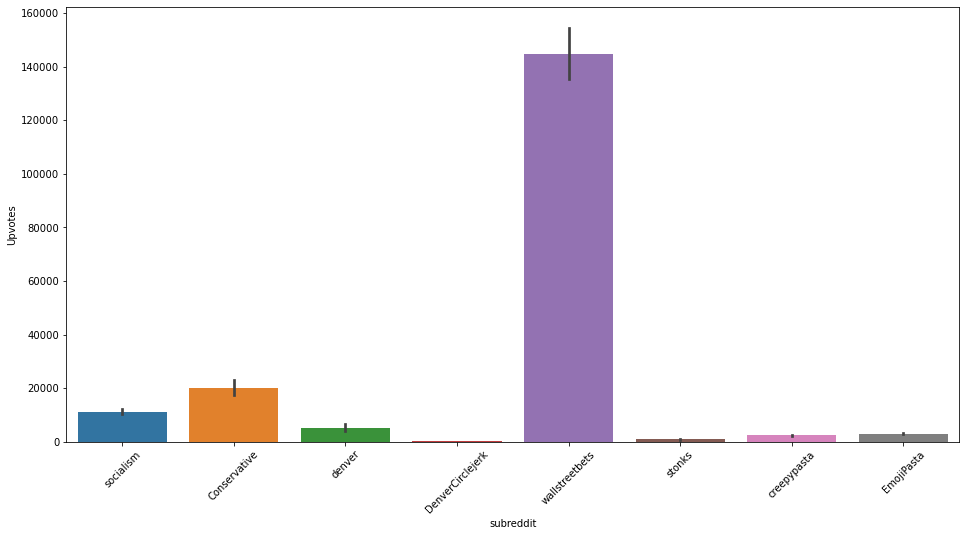

In [92]:
plt.figure(figsize=(16,8))
plt.xticks(rotation=45)
sns.barplot(x='subreddit',y='Upvotes',data=data)
plt.show()